# Week 2

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
from plotly import express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

## Excercise 2

In this excercise we will manually fit a linear regression model to given data

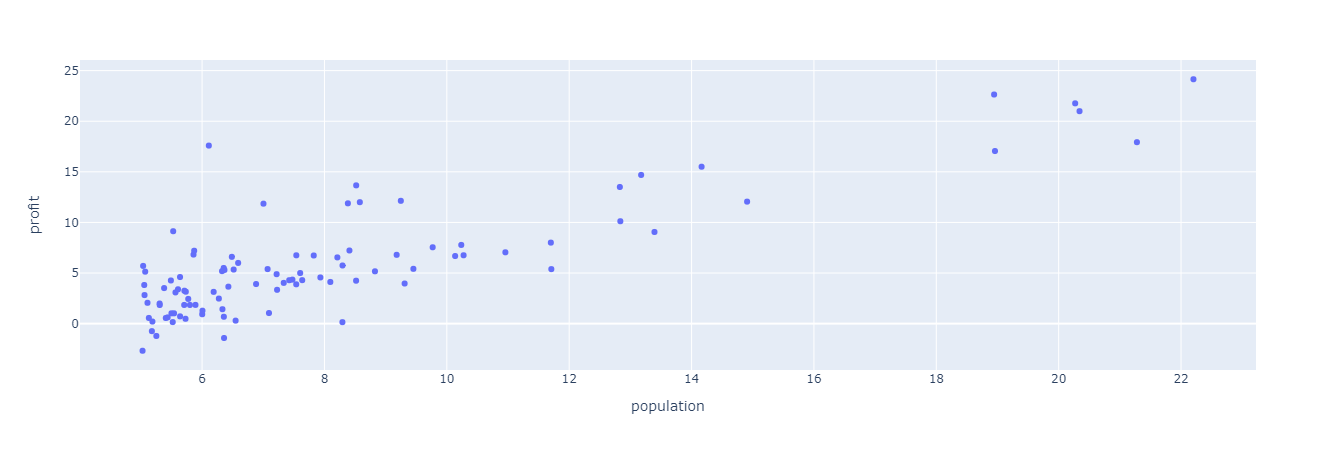

In [19]:
df = pd.read_csv("ex1data1.csv", names = ['population', 'profit'])
px.scatter(df,'population', 'profit')

The data seems to follow a linear trend, thus linear regression model would be a good aproximation for predicting the data

We will first implement it by hand, and then with a built in function

In [20]:
m = len(df)

In [21]:
x = df['population'] # training feature
y = df['profit'] # target

In [22]:
X = np.array([[1]*m,x]).T
y = np.array([y]).T
x = np.array([x]).T
theta = np.array([[-4],[-4]])

In [23]:
iterations = 1500
alpha = 0.0001

In [24]:
def cost_function(X, y , theta):
    m = len(y)
    return (1 / (2*m)) * np.power(X@theta - y,2).sum()
cost_function(X,y,theta)

1106.533015642363

In [43]:
def gradient_descent(X, y, theta, learning_rate = 0.001, iterations = 10000, cost_fun = cost_function):
    m = len(y)
    cost_history = []
    theta_history = []
    
    t = theta
    
    for i in range(iterations):
        
        error = X@t - y
        t  = t - (learning_rate/m)*X.T@error
        
        cost_history.append( cost_function(X,y,t) )
        theta_history.append(t)
        
    return t, cost_history, theta_history                                              

In [44]:
t,c_h,t_h = gradient_descent(X,y,theta,alpha,iterations)

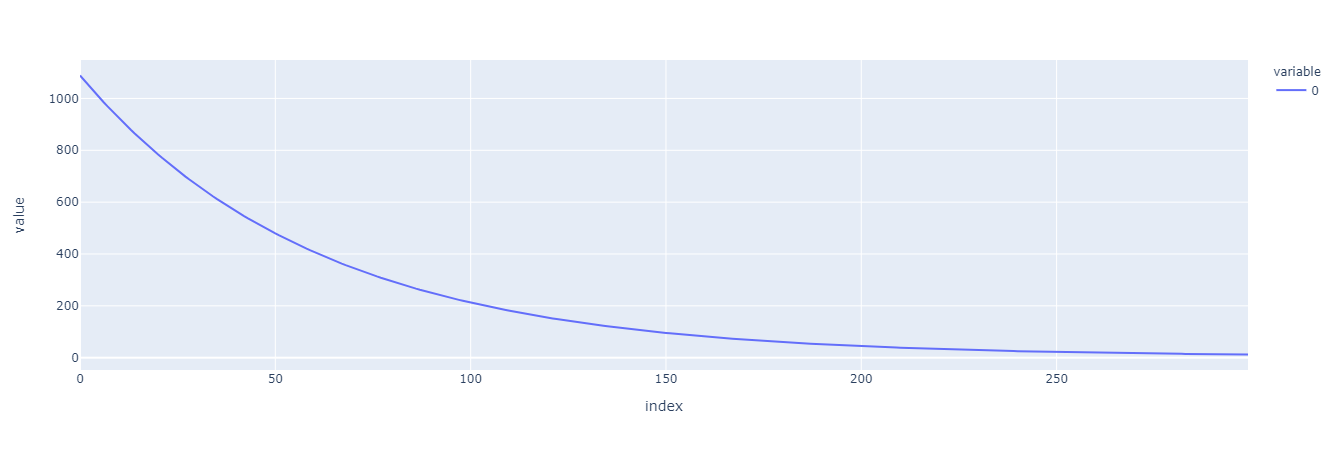

In [45]:
px.line(c_h[:300])

The cost function is decreasing with each itteration as expected

In [46]:
prediction = x*t[1] + t[0]

In [47]:
auto_predict = np.polyfit(x.reshape(-1),y.reshape(-1),deg = 1)
auto_values = x*auto_predict[0] + auto_predict[1]

In [48]:
auto_predict

array([ 1.19303364, -3.89578088])

Numpy fit

In [49]:
ols = linear_model.LinearRegression()
model = ols.fit(x, y)
print(f"{model.coef_}x + {model.intercept_}")

[[1.19303364]]x + [-3.89578088]


Same as polyfit

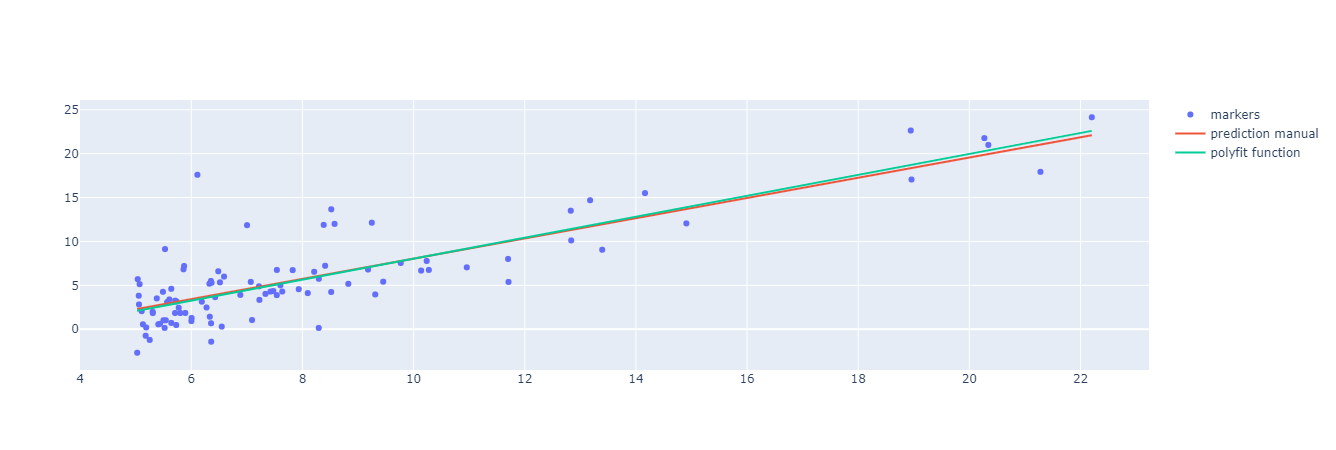

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.reshape(-1), y=y.reshape(-1),
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=x.reshape(-1), y=prediction.reshape(-1),
                    mode='lines',
                    name='prediction manual'))
fig.add_trace(go.Scatter(x=x.reshape(-1), y=auto_values.reshape(-1),
                    mode='lines',
                    name='polyfit function'))


The best fit predicted red line

In [54]:
lin_space = np.linspace(-5,5,80)
t1 = []
t2 = []
cost_fun = []

for xs in lin_space:
    for ys in lin_space:
        t1.append(xs),
        t2.append(ys),
        cost_fun.append(cost_function(X,y, np.array([[xs],[ys]])))

path_t1 = [i.item(0,0) for i in t_h]
path_t2 = [i.item(1,0) for i in t_h]

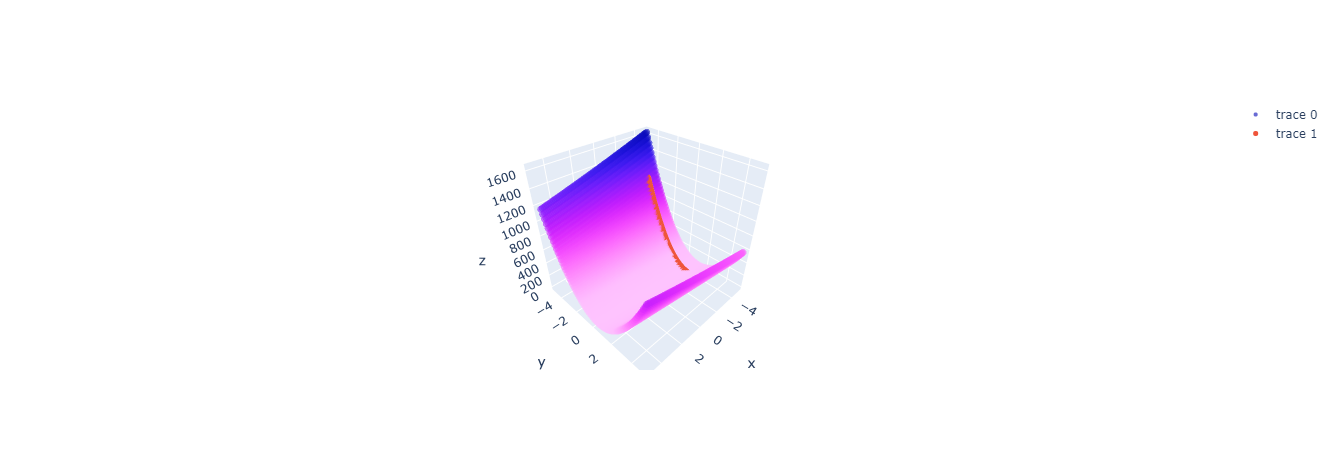

In [56]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=t1, y=t2, z=cost_fun,
        mode='markers',
        marker=dict(
                size=4,
                color=cost_fun,
                colorscale='Plotly3',
                reversescale = True,
                opacity=0.6
                )
                )
)
fig.add_trace(
    go.Scatter3d(
        x=path_t1[:800], y=path_t2[:800], z=c_h[:800],
        mode='markers',
        marker = dict(size = 5)
                )
)

Path of gradient descent given starting point (-4,-4)

## Excercise 3

Linear regression with multiple variables

In [57]:
df = pd.read_csv("ex1data2.csv", names = ['size','rooms', 'price'])

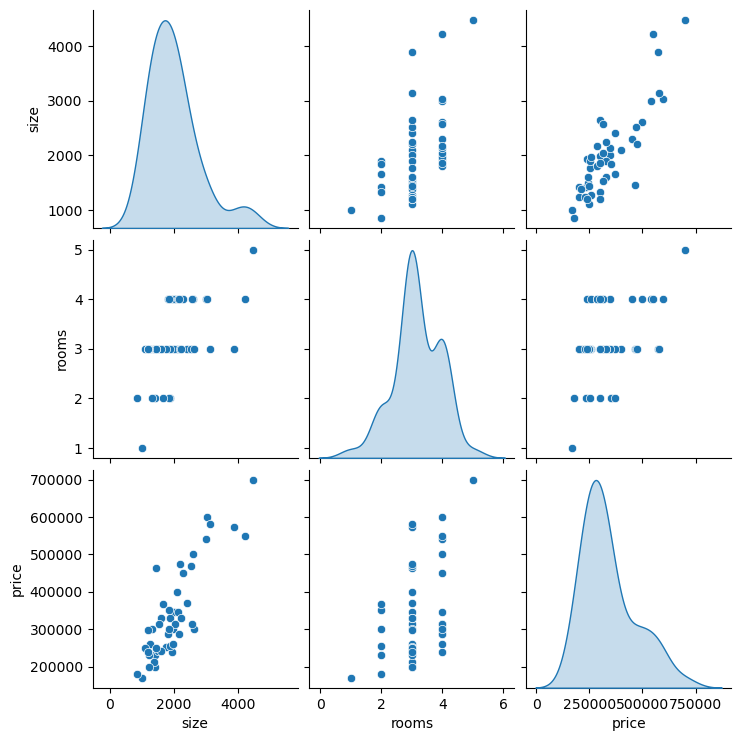

In [58]:
sns.pairplot(df, diag_kind = 'kde')

In [59]:
df.describe()

,size,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


We need to standardize the data 

In [60]:
def standardize_data(X):
    std = np.std(X,ddof=1)
    x_bar = X.mean()
    X_stand = [(x-x_bar) / std for x in X]
    
    return X_stand, x_bar, std

In [61]:
def revert_data(X_stand, x_bar, x_std):
    X = X_stand * x_std + x_bar
    return X

In [62]:
size_stand, size_bar, size_std = standardize_data(df['size'])
rooms_stand, rooms_bar, rooms_std = standardize_data(df['rooms'])
price_stand, price_bar, price_std = standardize_data(df['price'])

In [63]:
df_stand = pd.DataFrame([size_stand,rooms_stand,price_stand]).T
df_stand.columns = df.columns

### Gradient discent approach

In [64]:
def cost_function_m(X,Y,theta):
    m = len(Y)
    error = (X@theta - Y)
    
    return 1/(2*m) * error.T@error 

In [76]:
X = np.array([size_stand, rooms_stand]).T
X = np.insert(X,0,1,axis=1)
Y = np.array([price_stand]).T
theta = np.zeros((3,1))
X.shape

(47, 3)

In [77]:
theta_m, cost_history_m, theta_history_m = gradient_descent(X,Y,theta,cost_fun=cost_function_m,iterations=10000)
theta_m

array([[-1.11035600e-16],
       [ 8.78450989e-01],
       [-4.68640133e-02]])

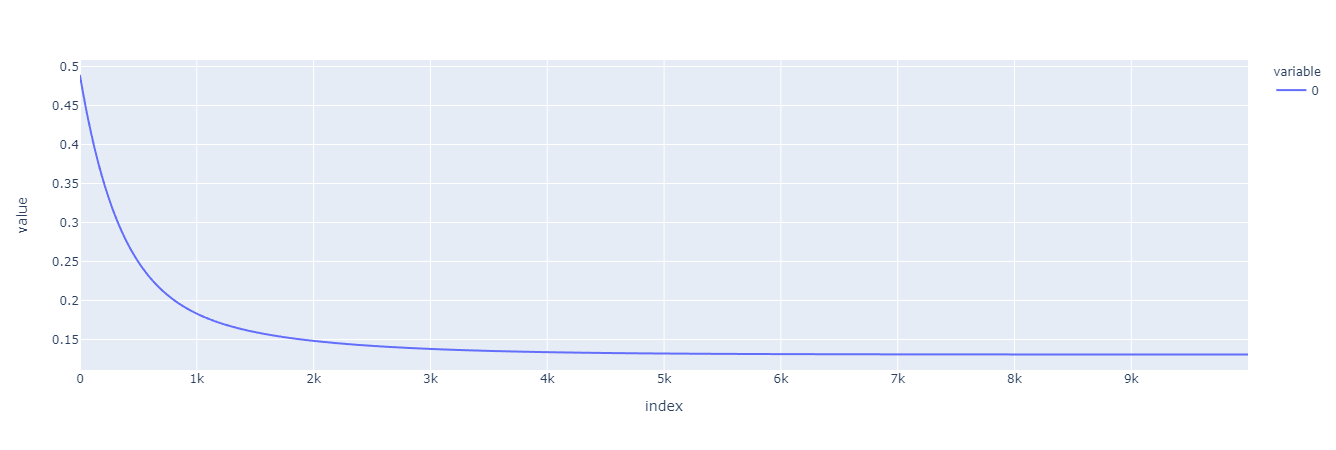

In [78]:
px.line(cost_history_m)

In [79]:
def perdict_price(size, rooms, params = theta_m):
    input_data = [1, (size - size_bar)/size_std, (rooms - rooms_bar)/rooms_std]
    pred = (np.array(input_data)@params)[0]
    
    pred_price = revert_data(pred, price_bar,price_std)
    return pred_price

In [80]:
size, room, price = df.sample().values.tolist()[0]
print(f"size: {size}, rooms: {room}, actual price: {price}")
print("-")
pred  = perdict_price(size,room)
print(f"predicted price: {round(pred)}")
print("-")
print(f"difference in: {round(pred)-price}")

size: 1839, rooms: 2, actual price: 349900
-
predicted price: 327077
-
difference in: -22823


### Matrix Multiplication minimization point finding apporach

In [81]:
theta_m2 = np.linalg.inv(X.T@X) @ X.T @ Y

In [82]:
theta_m2

array([[-9.36750677e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])

In [83]:
print(f"size: {size}, rooms: {room}, actual price: {price}")
print("-")
pred  = perdict_price(size,room,params = theta_m2)
print(f"predicted price: {round(pred)}")
print("-")
print(f"difference in: {round(pred)-price}")

size: 1839, rooms: 2, actual price: 349900
-
predicted price: 328130
-
difference in: -21770


### Sckikit linear model approach

In [84]:
X = df[['size', 'rooms']]
y = df['price']

regr = linear_model.LinearRegression(normalize=True)
regr.fit(X, y)

LinearRegression(normalize=True)

In [85]:
print(f"size: {size}, rooms: {room}, actual price: {price}")
print("-")
pred  = regr.predict([[size,room]])[0]
print(f"predicted price: {round(pred)}")
print("-")
print(f"difference in: {round(pred)-price}")

size: 1839, rooms: 2, actual price: 349900
-
predicted price: 328130
-
difference in: -21770
